## Лабораторная работа №3. Реализация сверточной нейронной сети

#### Данные: 
В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). 
Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.
#### Ход выполнения:


###### Задание 1.
Реализуйте нейронную сеть с двумя сверточными слоями, и одним полносвязным с нейронами с кусочно-линейной функцией активации. 
Какова точность построенное модели?

Используем данные, которые сгенерировали в лабораторной работ №1. Загрузим из файла notMNIST.pickle.

In [1]:
from __future__ import print_function

from six.moves import cPickle as pickle

pickle_file = '../lab1/notMNIST.pickle'

with open(pickle_file, 'rb') as file:
    saved_pickle = pickle.load(file)
    train_dataset = saved_pickle['train_dataset']
    train_labels = saved_pickle['train_labels']
    valid_dataset = saved_pickle['valid_dataset']
    valid_labels = saved_pickle['valid_labels']
    test_dataset = saved_pickle['test_dataset']
    test_labels = saved_pickle['test_labels']
    del saved_pickle  # gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)


Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (18000, 28, 28) (18000,)


Отобразим несколько экзепляров из набора данных.

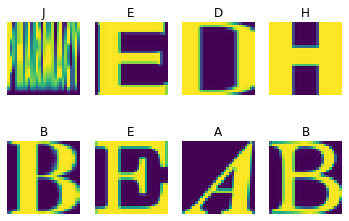

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline


pretty_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}

def disp_sample_dataset(dataset, labels, title=None):
    fig = plt.figure()
    if title: fig.suptitle(title, fontsize=16, fontweight='bold')
    items = random.sample(range(len(labels)), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(chr(ord('A') + labels[item]))
        plt.imshow(dataset[item])
    plt.show()
 
disp_sample_dataset(train_dataset, train_labels)

Преобразуем данные, чтобы были более адаптированы к модели, которую собираемся тренировать:

- данные в виде матрицы
- маркеры в виде one-hot кодировки

In [3]:
import tensorflow as tf

train_images = train_dataset.reshape(200000, 28, 28, 1).astype('float32') / 255.0
valid_images = valid_dataset.reshape(10000, 28, 28, 1).astype('float32') / 255.0
test_images = test_dataset.reshape(18000, 28, 28, 1).astype('float32') / 255.0

print(train_images.shape[0], 'train samples')
print(valid_images.shape[0], 'validation samples')
print(test_images.shape[0], 'test samples')

200000 train samples
10000 validation samples
18000 test samples


Используем библиотеку TensorFlow (v.2) для реализации нейронной сеть с двумя сверточными слоями (Conv2D), и одним полносвязным с нейронами (Dense) с функцией активации RELu. Отобразим построенную модель.

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                256010    
Total params: 308,106
Trainable params: 308,106
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.optimizers import Adam

def train_model(nn_model):
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    nn_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    train_history = nn_model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=2, validation_data=(valid_images, valid_labels))
    return train_history

history = train_model(model)

Train on 200000 samples, validate on 10000 samples
Epoch 1/10
200000/200000 - 324s - loss: 0.7590 - accuracy: 0.8006 - val_loss: 0.6823 - val_accuracy: 0.8206
Epoch 2/10
200000/200000 - 317s - loss: 0.6683 - accuracy: 0.8245 - val_loss: 0.6725 - val_accuracy: 0.8235
Epoch 3/10
200000/200000 - 315s - loss: 0.6572 - accuracy: 0.8266 - val_loss: 0.6667 - val_accuracy: 0.8237
Epoch 4/10
200000/200000 - 315s - loss: 0.6516 - accuracy: 0.8281 - val_loss: 0.6579 - val_accuracy: 0.8231
Epoch 5/10
200000/200000 - 313s - loss: 0.6463 - accuracy: 0.8292 - val_loss: 0.6540 - val_accuracy: 0.8265
Epoch 6/10
200000/200000 - 329s - loss: 0.6433 - accuracy: 0.8296 - val_loss: 0.6497 - val_accuracy: 0.8304
Epoch 7/10
200000/200000 - 374s - loss: 0.6412 - accuracy: 0.8302 - val_loss: 0.6516 - val_accuracy: 0.8257
Epoch 8/10
200000/200000 - 378s - loss: 0.6380 - accuracy: 0.8310 - val_loss: 0.6504 - val_accuracy: 0.8241
Epoch 9/10
200000/200000 - 373s - loss: 0.6369 - accuracy: 0.8308 - val_loss: 0.6456 

Отобразим графики точности обучения и потерь.

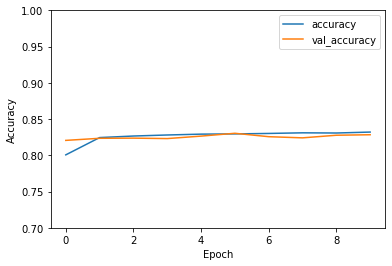

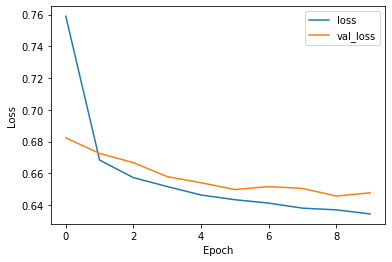

In [6]:
def plot_history(history_to_plot):
    plt.plot(history_to_plot.history['accuracy'], label='accuracy')
    plt.plot(history_to_plot.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.7, 1])
    plt.legend(loc='best')
    plt.show()

    plt.plot(history_to_plot.history['loss'], label='loss')
    plt.plot(history_to_plot.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()
 
plot_history(history)   

In [7]:
def test_model(test_on_model):
    test_loss, test_accuracy = test_on_model.evaluate(test_images, test_labels, verbose=2)
    print('Test accuracy = {0:.2f}%\nTest loss = {1:.2f}%'.format(test_accuracy*100.0, test_loss*100.0))

test_model(model)

18000/1 - 10s - loss: 0.5841 - accuracy: 0.8951
Test accuracy = 89.51%
Test loss = 40.89%


После обучения модель дает результат точности в 89.51%.

###### Задание 2.
Замените один из сверточных слоев на слой, реализующий операцию пулинга (Pooling) с функцией максимума или среднего. 
Как это повлияло на точность классификатора?

Заменим второй слой сети на пулинг с функцией максимума (MaxPool2D). Отобразим построенную модель.

In [8]:
from tensorflow.keras.layers import MaxPool2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                46090     
Total params: 46,922
Trainable params: 46,922
Non-trainable params: 0
_________________________________________________________________


Train on 200000 samples, validate on 10000 samples
Epoch 1/10
200000/200000 - 47s - loss: 0.9164 - accuracy: 0.7673 - val_loss: 0.7366 - val_accuracy: 0.8150
Epoch 2/10
200000/200000 - 49s - loss: 0.6912 - accuracy: 0.8189 - val_loss: 0.6864 - val_accuracy: 0.8149
Epoch 3/10
200000/200000 - 50s - loss: 0.6560 - accuracy: 0.8255 - val_loss: 0.6516 - val_accuracy: 0.8281
Epoch 4/10
200000/200000 - 50s - loss: 0.6354 - accuracy: 0.8291 - val_loss: 0.6348 - val_accuracy: 0.8310
Epoch 5/10
200000/200000 - 52s - loss: 0.6202 - accuracy: 0.8322 - val_loss: 0.6182 - val_accuracy: 0.8316
Epoch 6/10
200000/200000 - 47s - loss: 0.6074 - accuracy: 0.8346 - val_loss: 0.6071 - val_accuracy: 0.8346
Epoch 7/10
200000/200000 - 46s - loss: 0.5940 - accuracy: 0.8379 - val_loss: 0.5909 - val_accuracy: 0.8374
Epoch 8/10
200000/200000 - 50s - loss: 0.5778 - accuracy: 0.8419 - val_loss: 0.5732 - val_accuracy: 0.8391
Epoch 9/10
200000/200000 - 48s - loss: 0.5617 - accuracy: 0.8462 - val_loss: 0.5578 - val_acc

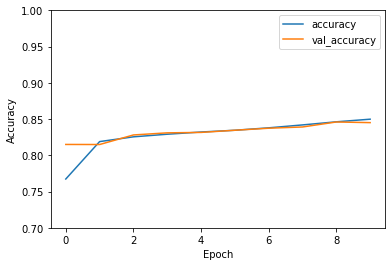

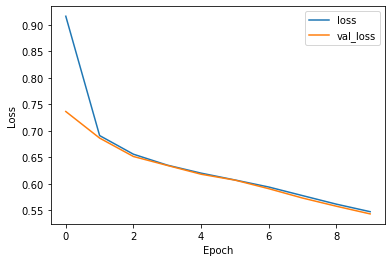

18000/1 - 2s - loss: 0.3517 - accuracy: 0.9118
Test accuracy = 91.18%
Test loss = 33.19%


In [9]:
history = train_model(model)
plot_history(history)
test_model(model)

Точность модели после замены слоя на пулинг измененилась до 91.18%. Стоит отметить, что значительно снизилось время на обучение сети за счет уменьшения количества используемых параметров.

###### Задание 3.
Реализуйте классическую архитектуру сверточных сетей LeNet-5 (http://yann.lecun.com/exdb/lenet/).

LeNet-5 представляет собой сеть с несколькими сверточными слоями с чередованием пулинга со средней функцией, а также с полносвязанными слоями для вывода результата сети.
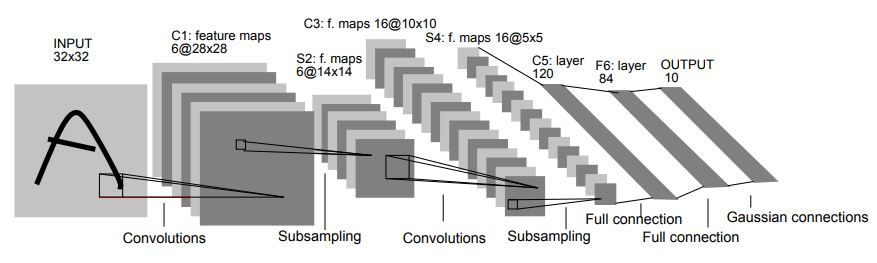

In [10]:
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

Train on 200000 samples, validate on 10000 samples
Epoch 1/10
200000/200000 - 65s - loss: 0.7450 - accuracy: 0.7862 - val_loss: 0.5391 - val_accuracy: 0.8402
Epoch 2/10
200000/200000 - 66s - loss: 0.5009 - accuracy: 0.8487 - val_loss: 0.4662 - val_accuracy: 0.8586
Epoch 3/10
200000/200000 - 69s - loss: 0.4474 - accuracy: 0.8640 - val_loss: 0.4287 - val_accuracy: 0.8678
Epoch 4/10
200000/200000 - 66s - loss: 0.4136 - accuracy: 0.8741 - val_loss: 0.4120 - val_accuracy: 0.8754
Epoch 5/10
200000/200000 - 67s - loss: 0.3894 - accuracy: 0.8812 - val_loss: 0.3979 - val_accuracy: 0.8784
Epoch 6/10
200000/200000 - 66s - loss: 0.3728 - accuracy: 0.8863 - val_loss: 0.3923 - val_accuracy: 0.8809
Epoch 7/10
200000/200000 - 66s - loss: 0.3592 - accuracy: 0.8902 - val_loss: 0.3770 - val_accuracy: 0.8841
Epoch 8/10
200000/200000 - 65s - loss: 0.3487 - accuracy: 0.8937 - val_loss: 0.3710 - val_accuracy: 0.8875
Epoch 9/10
200000/200000 - 65s - loss: 0.3401 - accuracy: 0.8957 - val_loss: 0.3610 - val_acc

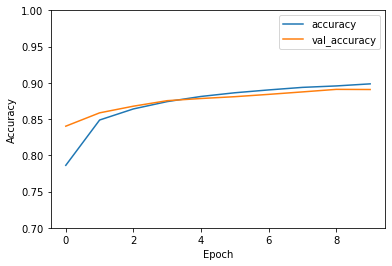

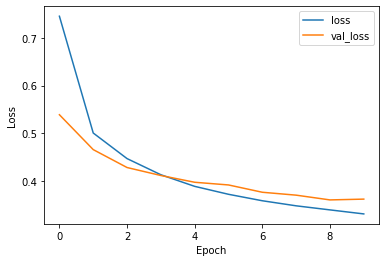

18000/1 - 3s - loss: 0.3389 - accuracy: 0.9433
Test accuracy = 94.33%
Test loss = 18.93%


In [11]:
history = train_model(model)
plot_history(history)
test_model(model)

###### Задание 4.
Сравните максимальные точности моделей, построенных в лабораторных работах 1-3. Как можно объяснить полученные различия?




Таким образом, на наборе данных notMNIST LeNet-5 модель показывает точность в 94.33%. Стоит отметить, что логистическая регрессия на наборе данных в 50000 показала результат точности в 88.73%, а полносвязанная нейронная сеть - 94.86%. Различие моделей обусловено архитектурой сети, подобранными параметрами для обучения моделей, функцией активации и выбранным оптимизатором. Однако, можно преположить, что на большей выборке сверточная нейронная сеть покажет наилучший результат с большим объемом данных. 